<a href="https://colab.research.google.com/github/theone67833/bigdata1/blob/main/0330_2%E4%BD%9C%E6%A5%AD_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("rJava")
install.packages("jiebaR")
install.packages("tmcn")
install.packages("dplyr")
install.packages("lubridate")
install.packages("stringr")
install.packages("wordcloud")
install.packages("Rwordseg" , repos = "http://R-Forge.R-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘jiebaRD’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘HMM’ is not available”
Warning message in install.packages("Rwordseg", repos = "http://R-Forge.R-project.org"):
“installation of package ‘Rwordseg’ had non-zero exit status”


In [3]:
library(dplyr)
library(lubridate)
library(stringr)
library(jiebaR)
library(wordcloud)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: jiebaRD

Loading required package: RColorBrewer



In [4]:
content <- "一艘隸屬於長榮海運的貨櫃輪傳出23日在蘇伊士運河上，疑似因為轉彎時擱淺，造成河道雙向交通受阻，埃及當局已經派遣拖船、大型機械協助長榮貨櫃輪脫困。外媒報導指，這艘由台灣長榮海運的貨船「Ever Given」在巴拿馬註冊，早前從台北出發途經馬來西亞，預計在3月31日，抵達荷蘭阿姆斯特丹。然而，船隻追蹤網站「VesselFinder」顯示，貨櫃輪在23日擱淺在蘇伊士運河，導致運河雙向交通封鎖了幾個小時。數據研究員在推特上貼出長榮貨櫃輪在運河上擱淺的觀測數據。（圖／翻攝自Twitter）數據研究員在推特上貼出長榮貨櫃輪在運河上擱淺的觀測數據。（圖／翻攝自Twitter）受到長榮貨櫃輪擱淺的影響，蘇伊士運河兩端有大批的船隻滯留。（圖／翻攝自VesselFinder）另一艘登記於美國的貨船Maersk Denver號，在河面上拍下擱淺的Ever Given，並指出，埃及當局派出了拖船以及挖土機協助Ever Given脫困。Maersk Denver號的船員柯納（Julianne Cona）在Instagram寫道「希望不會花費太多時間，但看起來船隻被卡的死死的。他們（埃及）之前派出了拖船試圖拉起來，但現在有一輛小挖土機在船頭附近工作。」柯納還補充道，Ever Give擱淺時，後面的船隻緊急停下，差點與Maersk Denver號相撞，讓她驚呼「真是刺激的一天。」外媒報導指，蘇伊士運河是世界上最忙碌的水道之一，但受到去年新冠肺炎（COVID-19）疫情影響，收入下降3%至56.1億美元，埃及總統阿卜杜勒-法塔赫・塞西 （Abdel Fattah Al-Sisi）先前宣布要整修這條擁有數百年歷史的運河。"

In [5]:
content

[1] "一艘隸屬於長榮海運的貨櫃輪傳出23日在蘇伊士運河上，疑似因為轉彎時擱淺，造成河道雙向交通受阻，埃及當局已經派遣拖船、大型機械協助長榮貨櫃輪脫困。外媒報導指，這艘由台灣長榮海運的貨船「Ever Given」在巴拿馬註冊，早前從台北出發途經馬來西亞，預計在3月31日，抵達荷蘭阿姆斯特丹。然而，船隻追蹤網站「VesselFinder」顯示，貨櫃輪在23日擱淺在蘇伊士運河，導致運河雙向交通封鎖了幾個小時。數據研究員在推特上貼出長榮貨櫃輪在運河上擱淺的觀測數據。（圖／翻攝自Twitter）數據研究員在推特上貼出長榮貨櫃輪在運河上擱淺的觀測數據。（圖／翻攝自Twitter）受到長榮貨櫃輪擱淺的影響，蘇伊士運河兩端有大批的船隻滯留。（圖／翻攝自VesselFinder）另一艘登記於美國的貨船Maersk Denver號，在河面上拍下擱淺的Ever Given，並指出，埃及當局派出了拖船以及挖土機協助Ever Given脫困。Maersk Denver號的船員柯納（Julianne Cona）在Instagram寫道「希望不會花費太多時間，但看起來船隻被卡的死死的。他們（埃及）之前派出了拖船試圖拉起來，但現在有一輛小挖土機在船頭附近工作。」柯納還補充道，Ever Give擱淺時，後面的船隻緊急停下，差點與Maersk Denver號相撞，讓她驚呼「真是刺激的一天。」外媒報導指，蘇伊士運河是世界上最忙碌的水道之一，但受到去年新冠肺炎（COVID-19）疫情影響，收入下降3%至56.1億美元，埃及總統阿卜杜勒-法塔赫・塞西 （Abdel Fattah Al-Sisi）先前宣布要整修這條擁有數百年歷史的運河。"

In [6]:
cutter <- worker(bylines = F)

In [7]:
cutter [content]

[1] "一艘"         "隸屬於"       "長榮"         "海運"         "的"          
  [6] "貨櫃"         "輪"           "傳出"         "23"           "日"          
 [11] "在"           "蘇伊士運河"   "上"           "疑似"         "因為"        
 [16] "轉彎"         "時"           "擱淺"         "造成"         "河道"        
 [21] "雙向交通"     "受阻"         "埃及"         "當局"         "已經"        
 [26] "派遣"         "拖船"         "大型"         "機械"         "協助"        
 [31] "長榮"         "貨櫃"         "輪"           "脫困"         "外媒"        
 [36] "報導"         "指"           "這艘"         "由"           "台灣"        
 [41] "長榮"         "海運"         "的"           "貨船"         "Ever"        
 [46] "Given"        "在"           "巴拿馬"       "註冊"         "早前"        
 [51] "從"           "台北"         "出發"         "途經"         "馬來西亞"    
 [56] "預計"         "在"           "3"            "月"           "31"          
 [61] "日"           "抵達"         "荷蘭"         "阿姆斯特丹"   "然而"        
 [66] "船隻"         "追蹤"         "網站"         "VesselFinder" "顯示"        
 [71] "貨櫃"         "輪"           "在"           "23"           "日"          
 [76] "擱淺"         "在"           "蘇伊士運河"   "導致"         "運河"        
 [81] "雙向交通"     "封鎖"         "了"           "幾個"         "小時"        
 [86] "數據"         "研究員"       "在"           "推特上"       "貼"          
 [91] "出"           "長榮"         "貨櫃"         "輪"           "在"          
 [96] "運河"         "上"           "擱淺"         "的"           "觀測"        
[101] "數據"         "圖"           "翻"           "攝"           "自"          
[106] "Twitter"      "數據"         "研究員"       "在"           "推特上"      
[111] "貼"           "出"           "長榮"         "貨櫃"         "輪"          
[116] "在"           "運河"         "上"           "擱淺"         "的"          
[121] "觀測"         "數據"         "圖"           "翻"           "攝"          
[126] "自"           "Twitter"      "受到"         "長榮"         "貨櫃"        
[131] "輪"           "擱淺"         "的"           "影響"         "蘇伊士運河"  
[136] "兩端"         "有"           "大批"         "的"           "船隻"        
[141] "滯留"         "圖"           "翻"           "攝"           "自"          
[146] "VesselFinder" "另"           "一艘"         "登記"         "於"          
[151] "美國"         "的"           "貨船"         "Maersk"       "Denver"      
[156] "號"           "在"           "河面上"       "拍下"         "擱淺"        
[161] "的"           "Ever"         "Given"        "並"           "指出"        
[166] "埃及"         "當局"         "派出"         "了"           "拖船"        
[171] "以及"         "挖土機"       "協助"         "Ever"         "Given"       
[176] "脫困"         "Maersk"       "Denver"       "號的"         "船員"        
[181] "柯納"         "Julianne"     "Cona"         "在"           "Instagram"   
[186] "寫道"         "希望"         "不會"         "花費"         "太多"        
[191] "時間"         "但"           "看起來"       "船隻"         "被"          
[196] "卡"           "的"           "死死的"       "他們"         "埃及"        
[201] "之前"         "派出"         "了"           "拖船"         "試圖"        
[206] "拉"           "起來"         "但"           "現在"         "有"          
[211] "一輛"         "小"           "挖土機"       "在"           "船頭"        
[216] "附近"         "工作"         "柯"           "納"           "還"          
[221] "補充"         "道"           "Ever"         "Give"         "擱淺"        
[226] "時"           "後面"         "的"           "船隻"         "緊急"        
[231] "停下"         "差點"         "與"           "Maersk"       "Denver"      
[236] "號"           "相撞"         "讓"           "她"           "驚呼"        
[241] "真是"         "刺激"         "的"           "一天"         "外"          
[246] "媒"           "報導"         "指"           "蘇伊士運河"   "是"          
[251] "世界"         "上"           "最"           "忙碌"         "的"          
[256] "水道"         "之一"         "但"           "受到"         "去年"        
[261] "新冠"         "肺炎"         "COVID"        "19"           "疫情"        
[266] "影響"         "收入"         "下降"         "3"            "至"          
[271] "56.1"         "億美元"       "埃及"         "總統"     

In [8]:
new_words <- c("傳染性肺炎","醫療體系","防疫措施")
for(i in 1:length(new_words)){new_user_word(cutter,new_words[i])}

In [9]:
writeLines(new_words, "new_words.txt")

In [10]:
stop_words <- c("在","之","更","個","未","而","也","與","的")
writeLines(stop_words, "stop_words.txt")

In [11]:
cutter <- worker(user = "new_words.txt", stop_word = "stop_words.txt",
bylines = FALSE)
seg_words <- cutter[content]
seg_words

[1] "一艘"         "隸屬於"       "長榮"         "海運"         "貨櫃"        
  [6] "輪"           "傳出"         "23"           "日"           "蘇伊士運河"  
 [11] "上"           "疑似"         "因為"         "轉彎"         "時"          
 [16] "擱淺"         "造成"         "河道"         "雙向交通"     "受阻"        
 [21] "埃及"         "當局"         "已經"         "派遣"         "拖船"        
 [26] "大型"         "機械"         "協助"         "長榮"         "貨櫃"        
 [31] "輪"           "脫困"         "外媒"         "報導"         "指"          
 [36] "這艘"         "由"           "台灣"         "長榮"         "海運"        
 [41] "貨船"         "Ever"         "Given"        "巴拿馬"       "註冊"        
 [46] "早前"         "從"           "台北"         "出發"         "途經"        
 [51] "馬來西亞"     "預計"         "3"            "月"           "31"          
 [56] "日"           "抵達"         "荷蘭"         "阿姆斯特丹"   "然而"        
 [61] "船隻"         "追蹤"         "網站"         "VesselFinder" "顯示"        
 [66] "貨櫃"         "輪"           "23"           "日"           "擱淺"        
 [71] "蘇伊士運河"   "導致"         "運河"         "雙向交通"     "封鎖"        
 [76] "了"           "幾個"         "小時"         "數據"         "研究員"      
 [81] "推特上"       "貼"           "出"           "長榮"         "貨櫃"        
 [86] "輪"           "運河"         "上"           "擱淺"         "觀測"        
 [91] "數據"         "圖"           "翻"           "攝"           "自"          
 [96] "Twitter"      "數據"         "研究員"       "推特上"       "貼"          
[101] "出"           "長榮"         "貨櫃"         "輪"           "運河"        
[106] "上"           "擱淺"         "觀測"         "數據"         "圖"          
[111] "翻"           "攝"           "自"           "Twitter"      "受到"        
[116] "長榮"         "貨櫃"         "輪"           "擱淺"         "影響"        
[121] "蘇伊士運河"   "兩端"         "有"           "大批"         "船隻"        
[126] "滯留"         "圖"           "翻"           "攝"           "自"          
[131] "VesselFinder" "另"           "一艘"         "登記"         "於"          
[136] "美國"         "貨船"         "Maersk"       "Denver"       "號"          
[141] "河面上"       "拍下"         "擱淺"         "Ever"         "Given"       
[146] "並"           "指出"         "埃及"         "當局"         "派出"        
[151] "了"           "拖船"         "以及"         "挖土機"       "協助"        
[156] "Ever"         "Given"        "脫困"         "Maersk"       "Denver"      
[161] "號的"         "船員"         "柯納"         "Julianne"     "Cona"        
[166] "Instagram"    "寫道"         "希望"         "不會"         "花費"        
[171] "太多"         "時間"         "但"           "看起來"       "船隻"        
[176] "被"           "卡"           "死死的"       "他們"         "埃及"        
[181] "之前"         "派出"         "了"           "拖船"         "試圖"        
[186] "拉"           "起來"         "但"           "現在"         "有"          
[191] "一輛"         "小"           "挖土機"       "船頭"         "附近"        
[196] "工作"         "柯"           "納"           "還"           "補充"        
[201] "道"           "Ever"         "Give"         "擱淺"         "時"          
[206] "後面"         "船隻"         "緊急"         "停下"         "差點"        
[211] "Maersk"       "Denver"       "號"           "相撞"         "讓"          
[216] "她"           "驚呼"         "真是"         "刺激"         "一天"        
[221] "外"           "媒"           "報導"         "指"           "蘇伊士運河"  
[226] "是"           "世界"         "上"           "最"           "忙碌"        
[231] "水道"         "之一"         "但"           "受到"         "去年"        
[236] "新冠"         "肺炎"         "COVID"        "19"           "疫情"        
[241] "影響"         "收入"         "下降"         "3"            "至"          
[246] "56.1"         "億美元"       "埃及"         "總統"         "阿卜杜勒"    
[251] "法塔赫"       "・"           "塞"           "西"           "Abdel"       
[256] "Fattah"       "Al"           "Sisi"         "先前"         "宣布"        
[261] "要"           "整修"         "這條"         "擁有"         "數百年"      
[266] "歷史"         "運河"

In [12]:
# 計算詞彙頻率
txt_freq <- freq(seg_words)
# 由大到小排列
txt_freq <- arrange(txt_freq, desc(freq))
# 檢查前5名
head(txt_freq)

,char,freq
,<chr>,<dbl>
1,擱淺,7
2,長榮,6
3,輪,6
4,貨櫃,6
5,蘇伊士運河,4
6,數據,4


Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in strheight(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'sans' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in strwidth(words[i], cex = size[i], ...):


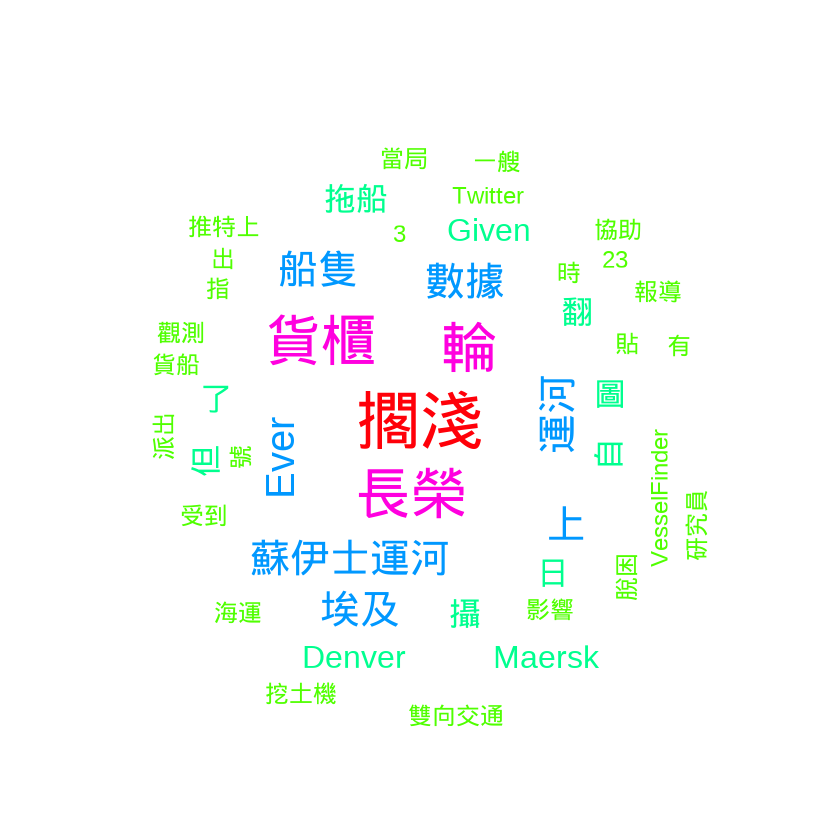

In [17]:
par(family=("Microsoft YaHei")) #一般wordcloud需要定義字體，不然會無法顯示中文
# 一般的文字雲 (pkg: wordcloud)
wordcloud(txt_freq$char, txt_freq$freq, min.freq = 2, random.order = F, ordered.colors = F, colors = rainbow(nrow(txt_freq)))

In [14]:
install.packages("showtext")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [15]:
library(showtext)

Loading required package: sysfonts

Loading required package: showtextdb



In [16]:
showtext.auto(enable = TRUE)

'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code

